#Visualização e análise de dados

##Importação de bibliotecas e descrição do dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds = pd.read_csv('train_clean.csv')

Setando a feature "employee_id" como index

In [ ]:
ds = ds.set_index('employee_id')

Breve descrição do dataset

In [ ]:
ds.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0.0
65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0.0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0.0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0.0
48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47016 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            47016 non-null  object 
 1   region                47016 non-null  object 
 2   education             47016 non-null  object 
 3   gender                47016 non-null  object 
 4   recruitment_channel   47016 non-null  object 
 5   no_of_trainings       47016 non-null  float64
 6   age                   47016 non-null  int64  
 7   previous_year_rating  47016 non-null  float64
 8   length_of_service     47016 non-null  int64  
 9   awards_won?           47016 non-null  int64  
 10  avg_training_score    47016 non-null  float64
 11  is_promoted           47016 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.7+ MB


In [ ]:
ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000
mean,1.259826,34.420559,3.302259,5.717415,0.022758,63.504318,0.084822
std,0.616446,7.318609,1.214798,4.109160,0.149133,13.497809,0.278620
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,38.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
ds.describe(include='object')

,department,region,education,gender,recruitment_channel
count,47016,47016,47016,47016,47016
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,14648,7440,33879,36181,26128


##Dados Numéricos

In [ ]:
ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000,47016.000000
mean,1.259826,34.420559,3.302259,5.717415,0.022758,63.504318,0.084822
std,0.616446,7.318609,1.214798,4.109160,0.149133,13.497809,0.278620
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,38.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Correlações entre as variáveis numéricas

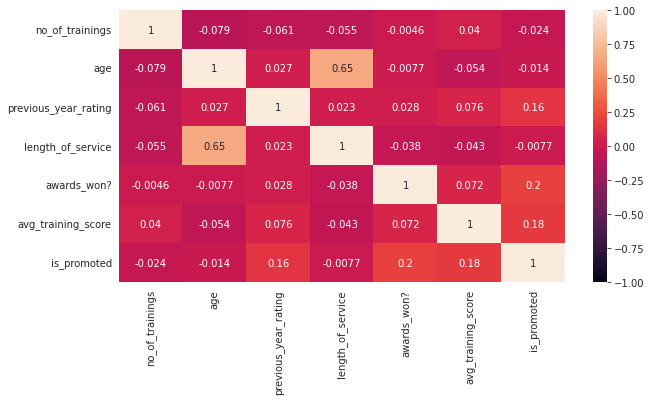

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1)

Vemos que 3 features possuem correlações relevantes com a nossa feature target("is_promoted"): "previous_year_rating" e "avg_training_score". Desse modo, iremos analisar mais de perto tais relações. Lembrando que "awards_won?" foi tratado como variável categórica, já que existem apenas 2 valores únicos nesta feature.

###"Previous year rating"

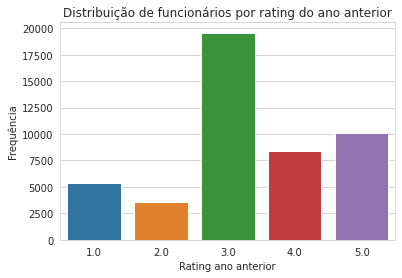

In [ ]:
sns.countplot(x='previous_year_rating', data=ds)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por rating do ano anterior')
plt.xlabel('Rating ano anterior')
plt.ylabel('Frequência')
plt.show()

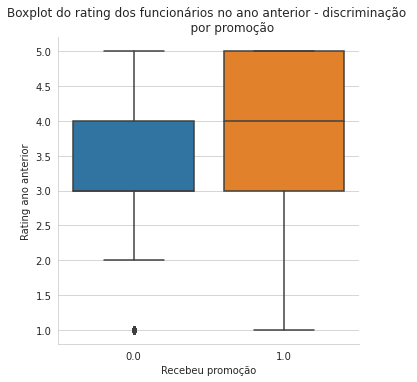

In [ ]:
sns.catplot(x='is_promoted', y='previous_year_rating', data=ds, kind='box')
plt.title('''Boxplot do rating dos funcionários no ano anterior - discriminação 
            por promoção''')
plt.xlabel('Recebeu promoção')
plt.ylabel('Rating ano anterior')
plt.show()

Vemos pelo boxplot acima que aqueles que receberam uma promoção possuem um rating maior do que os que não receberam uma promoção.

###"Average training score"

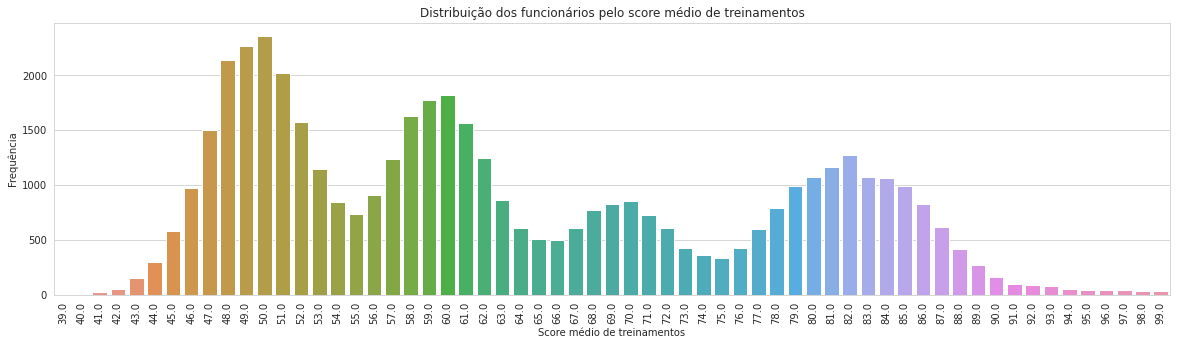

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='avg_training_score', data=ds)
plt.xticks(rotation=90)
plt.title('Distribuição dos funcionários pelo score médio de treinamentos')
plt.xlabel('Score médio de treinamentos')
plt.ylabel('Frequência')
plt.show()

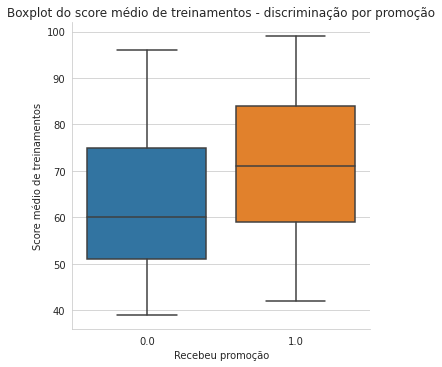

In [ ]:
sns.catplot(x='is_promoted', y='avg_training_score', data=ds, kind='box')
plt.title('Boxplot do score médio de treinamentos - discriminação por promoção')
plt.xlabel('Recebeu promoção')
plt.ylabel('Score médio de treinamentos')
plt.show()

Vemos também que o score médio de treinamentos é maior para funcionários promovidos.

###"Age"

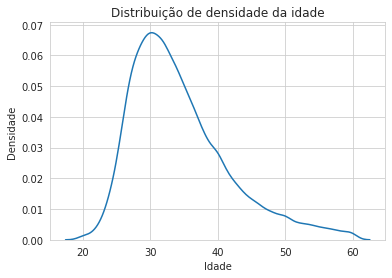

In [ ]:
sns.kdeplot(ds['age'])
plt.title('Distribuição de densidade da idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

Relação entre 'age' e 'length of service'

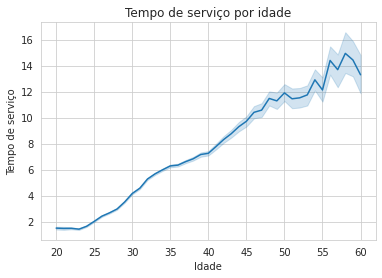

In [ ]:
sns.lineplot(x='age', y='length_of_service', data=ds)
plt.title('Tempo de serviço por idade')
plt.xlabel('Idade')
plt.ylabel('Tempo de serviço')
plt.show()

Vimos no heatmap que idade e tempo de serviço estão fortemente correlacionados. O lineplot acima demonstra tal correlação positiva de maneira bem clara.

##Dados Categóricos

Nesta sessão iremos analisar as relações entre as features categóricas e a nossa feature target (is_promoted), bem como as relações entre as próprias features. É preciso lembrar que as relações entre as variáveis não se dão apenas de forma direta, de maneira que iremos nos debruçar sobre as relações entre as variáveis categóricas e as numéricas que possuem alguma correlação significante com a nossa target.

###"Department"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


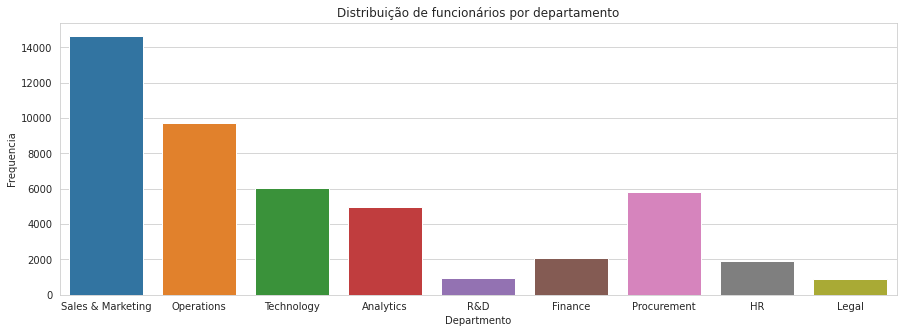

In [ ]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(ds['department'], data=ds)
plt.title('Distribuição de funcionários por departamento')
plt.xlabel('Departmento')
plt.ylabel('Frequencia')
plt.show()

Observando o gráfico, vemos que "Sales & Marketing" posssui o maior número de empregados, seguido de "Operations", "Procurement" e "Technology".

<Figure size 1440x720 with 0 Axes>

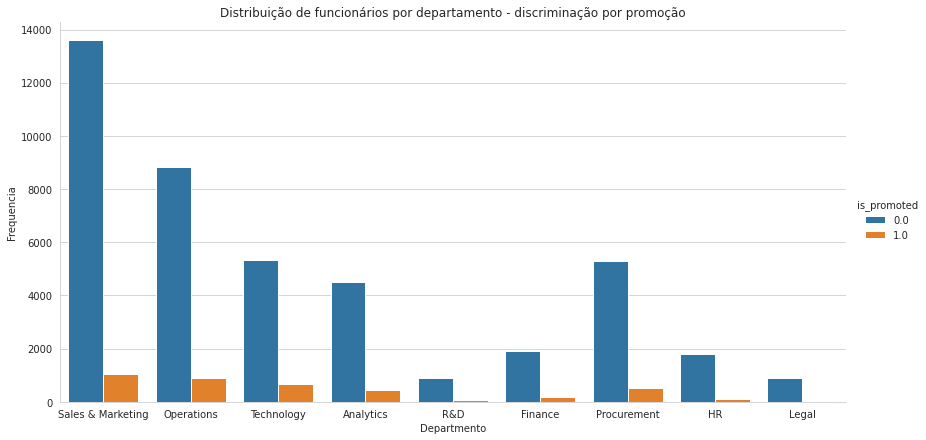

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.catplot(x='department', data=ds, hue='is_promoted',kind='count', height=6, aspect=2)
plt.title('Distribuição de funcionários por departamento - discriminação por promoção')
plt.xlabel('Departmento')
plt.ylabel('Frequencia')
plt.show()

Mesmo com este gráfico, ainda assim é difícil visualizar se há uma relação entre o departamento e a promoção do funcionário. Assim, optou-se por fazer um gráfico que mostra a proporção de empregados que foram promovidos por departamento.

In [ ]:
#Agrupando por departamente e em seguida por promoção
ds_dpt = ds.groupby(['department', 'is_promoted'])['region'].count()
#Criação de um array que armazene a proporção de funcionários promovidos
dpt_prop = []
for n in range(0, len(ds_dpt), 2):
  dpt_prop.append(ds_dpt.iloc[n+1]/(ds_dpt.iloc[n]+ds_dpt.iloc[n+1]))

In [ ]:
#Criação de um dataframe que armazene o array criado anteriormente com as devidas categorias
ds_dpt_prop = pd.DataFrame({'department': ['Analytics', 'Finance', 'HR', 'Legal',
                                           'Operations', 'Procurement', 'R&D',
                                           'Sales & Marketing', 'Technology'],
                            'proportion': dpt_prop})

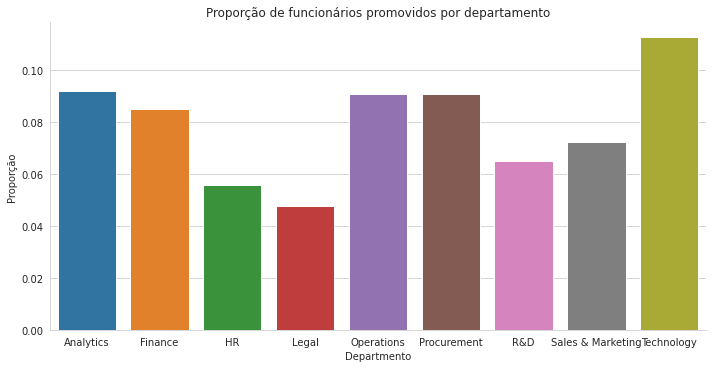

In [ ]:
sns.catplot(x='department', y='proportion', data=ds_dpt_prop,kind='bar', height=5, aspect=2)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por departamento')
plt.xlabel('Departmento')
plt.ylabel('Proporção')
plt.show()

Finalmente, fica mais claro que existem departamentos com uma maior porcentagem de funcionários promovidos, em especial o departamento de Tecnologia, no qual mais de 10% dos empregados foram promovidos

####Relação entre "department" e outras features

#####Departmento x Rating do ano anterior

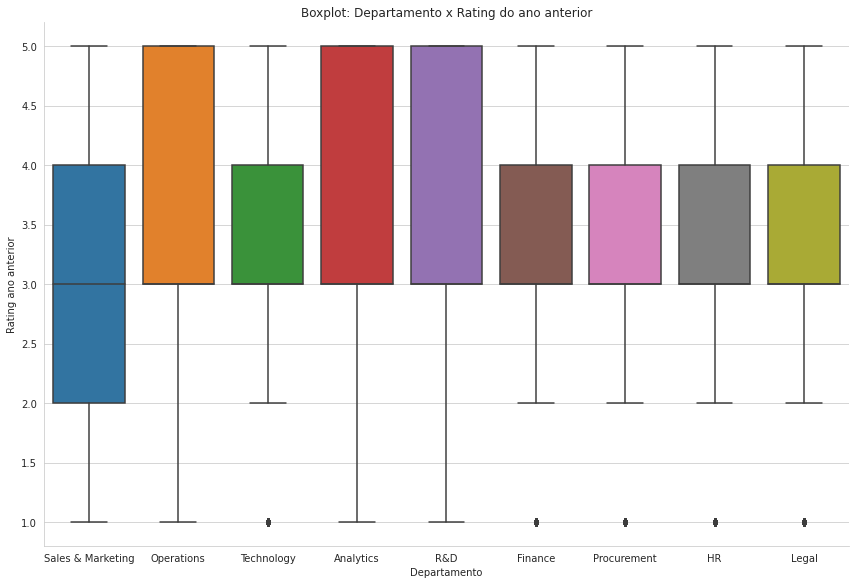

In [ ]:
sns.catplot(x='department', y='previous_year_rating', data=ds, kind='box', height=8, aspect=1.5)
plt.title('Boxplot: Departamento x Rating do ano anterior')
plt.xlabel('Departamento')
plt.ylabel('Rating ano anterior')
plt.show()

Vemos aqui que 3 departamentos possuem um rating médio melhor que os demais: "Operations", "Analytics" e "R&D". Por outro lado, "Sales & Marketing" fica mais abaixo, porém, isso pode ser em função do grande número de funcionários que trabalham neste departamento.

#####Departamento x Score médio de treinamentos

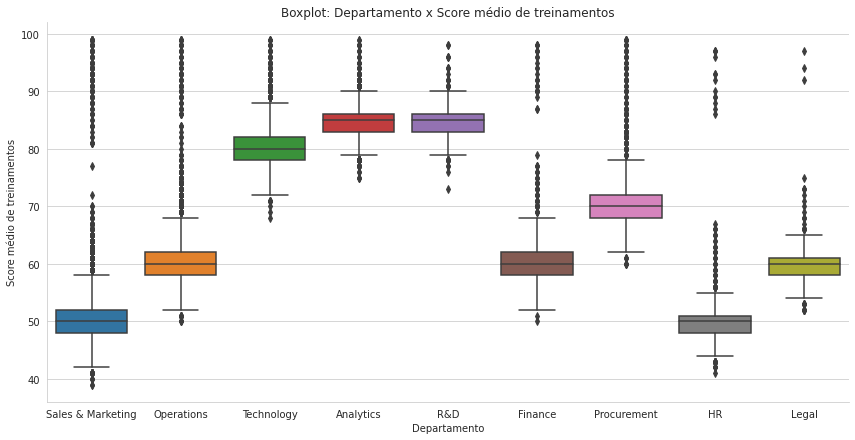

In [ ]:
sns.catplot(x='department', y='avg_training_score', data=ds, kind='box', height=6, aspect=2)
plt.title('Boxplot: Departamento x Score médio de treinamentos')
plt.xlabel('Departamento')
plt.ylabel('Score médio de treinamentos')
plt.show()

Quando se trata do score médio de treinamento, a distribuição por departamento é bem mais caótica. "Sales & Marketing" aparece novamente como uma das mais fracas, acompannhado de "HR". Por outro lado, "Analytics" e "R&D" aparecem como destaques positivos novamente.

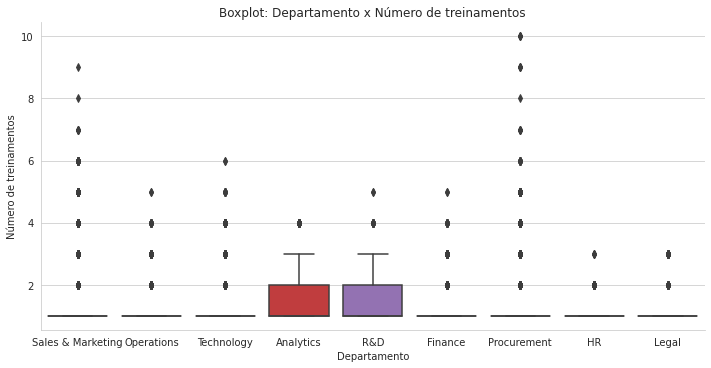

In [ ]:
sns.catplot(x='department', y='no_of_trainings', data=ds, kind='box', height=5, aspect=2)
plt.title('Boxplot: Departamento x Número de treinamentos')
plt.xlabel('Departamento')
plt.ylabel('Número de treinamentos')
plt.show()

Esse insight pode ser, no entanto, resultado do maior número de treinamentos que esses dois departamentos fazem, como mostra o gráfico acima.

###"Region"

In [ ]:
#Criando um array para ordenar as regiões quando formos plotar o gráfico
regions = ['region_1', 'region_2', 'region_3', 'region_4', 'region_5', 
           'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
           'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
           'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
           'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
           'region_26', 'region_27', 'region_28', 'region_29', 'region_30', 
           'region_31', 'region_32', 'region_33', 'region_34']

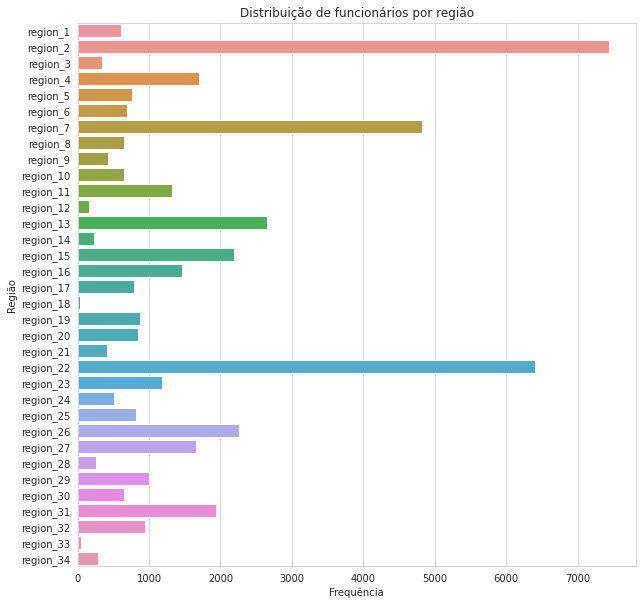

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='region', data=ds, order=regions)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por região')
plt.ylabel('Região')
plt.xlabel('Frequência')
plt.show()

Analisando o gráfico, observamos a predominância de 3 regiões: 2, 7, 22

<Figure size 720x864 with 0 Axes>

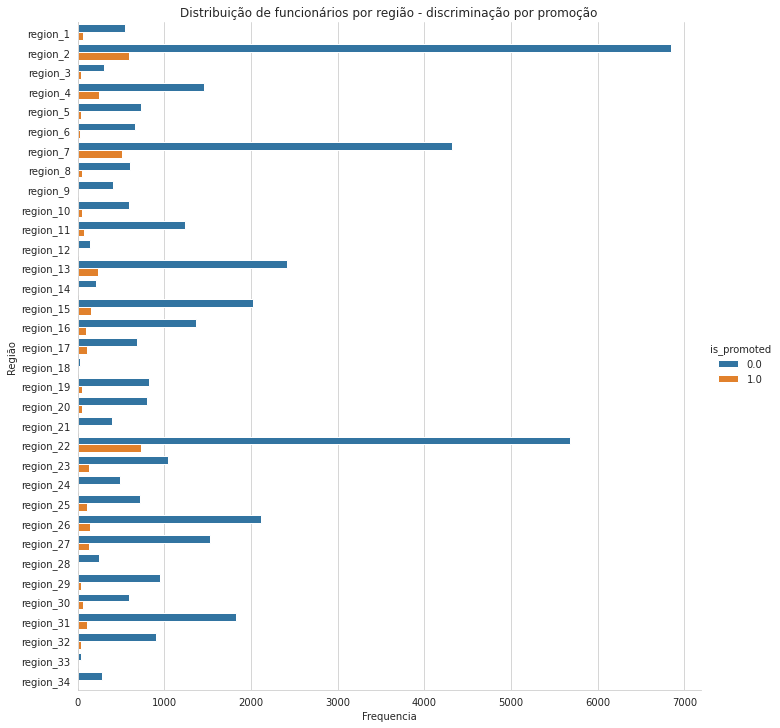

In [ ]:
plt.figure(figsize=(10,12))
sns.set_style('whitegrid')
sns.catplot(y='region', hue='is_promoted',data=ds, order=regions, kind='count', height= 10,aspect=1)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por região - discriminação por promoção')
plt.ylabel('Região')
plt.xlabel('Frequencia')
plt.show()

Recaímos no mesmo problema da feature anterior, em que não se tem uma noção muito boa de qual seria a proporção de empregados promovidos em cada região. Portanto, faremos o mesmo procedimento.

In [ ]:
ds_region = ds.groupby(['region', 'is_promoted'])['department'].count()
region_prop = []
for n in range(0, len(ds_region), 2):
  region_prop.append(ds_region.iloc[n+1]/(ds_region.iloc[n]+ds_region.iloc[n+1]))

In [ ]:
ds_region_prop = pd.DataFrame({'region': ['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
                                          'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 
                                          'region_19', 'region_2', 'region_20', 'region_21', 'region_22', 
                                          'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 
                                          'region_28', 'region_29', 'region_3', 'region_30', 'region_31', 
                                          'region_32', 'region_33', 'region_34', 'region_4', 'region_5', 
                                          'region_6', 'region_7', 'region_8', 'region_9'],
                                          'proportion': region_prop})

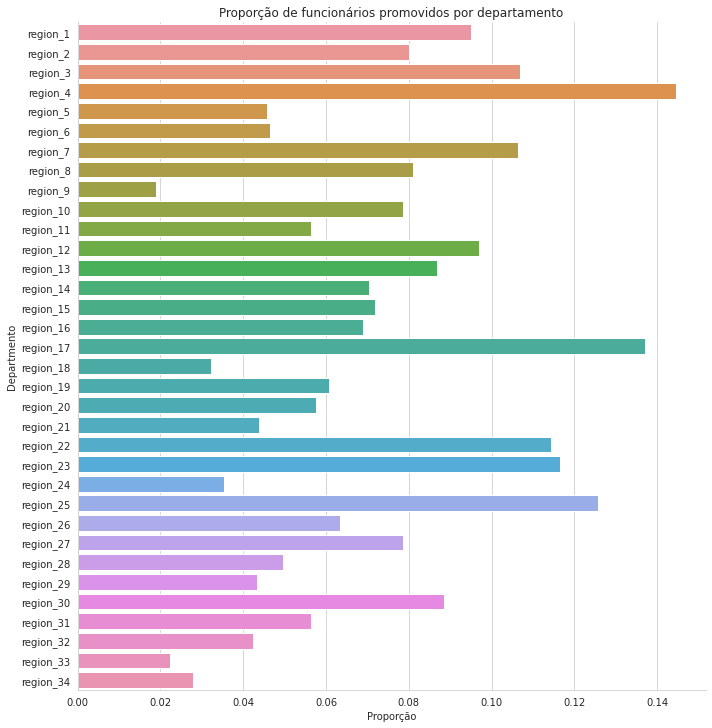

In [ ]:
sns.catplot(y='region', x='proportion',data=ds_region_prop, order=regions, kind='bar', height=10)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por departamento')
plt.ylabel('Departmento')
plt.xlabel('Proporção')
plt.show()

*   Regiões de destaque positivo (>10%): 3, 4, 7, 17, 22, 23, 25, 28
*   Regiões de destaque negativo (<04%): 9, 18, 24, 33, 34  
Agora podemos ver com mais clareza qual é a proporção de empregados promovidos em regiões com menos representantes. É preciso lembrar, no entanto, que essas amostras menores podem apresentar resultados eviesados. 
Apesar disso é possível ver que regiões com muitos representantes como 7 e 22 possuem bons números.





####"Region" e outras features

#####Região x Rating médio do ano passado

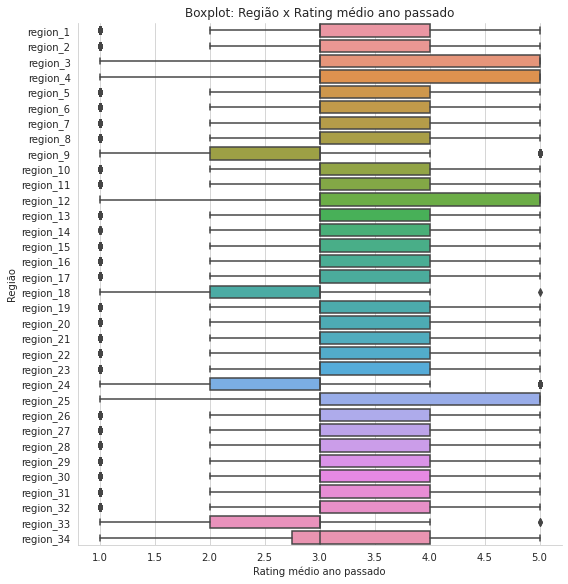

In [ ]:
sns.catplot(y='region', x='previous_year_rating', data=ds, kind='box', height=8, aspect=1, order=regions)
plt.title('Boxplot: Região x Rating médio ano passado')
plt.xlabel('Rating médio ano passado')
plt.ylabel('Região')
plt.show()

Vemos que, de acordo com esta métrica, as regiões de destaque positivo são: 3, 4, 25 e 28. As de destaque negativo são: 9, 18, 24 e 33.
Tais resultados corroboram com os achados no gráfico da proporção de funcionários promovidos por região.

#####Região x Score médio de treinamentos

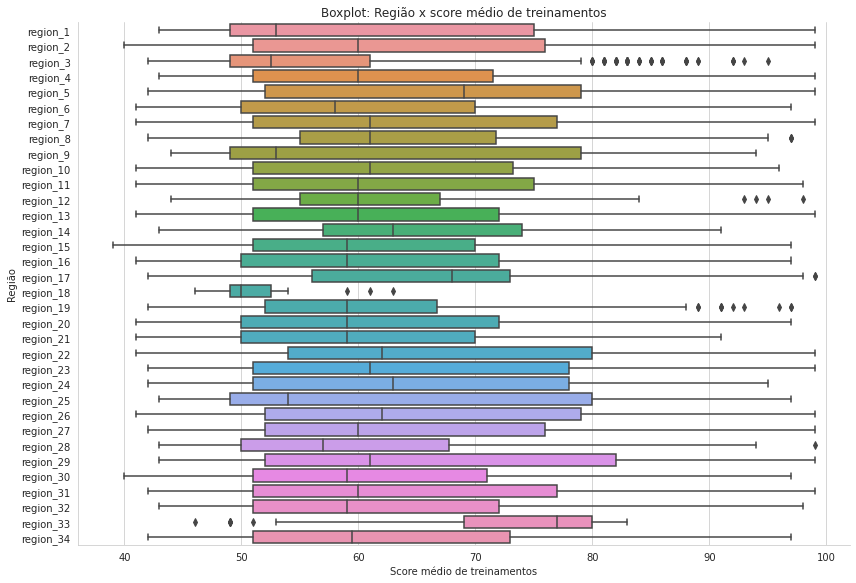

In [ ]:
sns.catplot(y='region', x='avg_training_score', data=ds, kind='box', height=8, aspect=1.5, order=regions)
plt.title('Boxplot: Região x score médio de treinamentos')
plt.xlabel('Score médio de treinamentos')
plt.ylabel('Região')
plt.show()

Entrando na contramão dos resultados anteriores, temos o gráfico acima, que, por exemplo, tem a região 33 como uma das melhores regiões. Isso mostra por que o score médio de treinamentos não possui uma correlação forte com o rating do ano anterior. Pode indicar também que existe um componente que, no momento, não é possível ser capturado na análise.

###"Education"

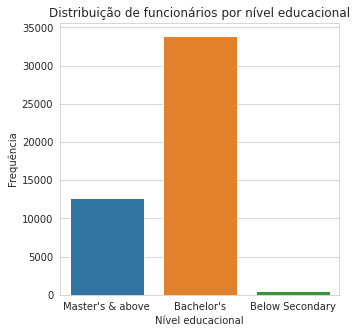

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='education', data=ds)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por nível educacional')
plt.xlabel('Nível educacional')
plt.ylabel('Frequência')
plt.show()

Vemos que a maioria dos empregados possui um diploma de bacharel, sendo que alguns possuem mestrado e outros. Por outro lado, há um número muito pequeno que não terminou o ensino médio.

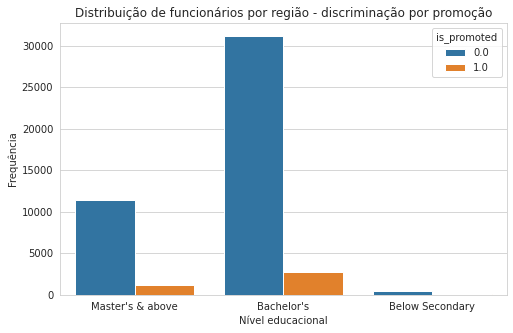

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='education', data=ds, hue='is_promoted')
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por região - discriminação por promoção')
plt.xlabel('Nível educacional')
plt.ylabel('Frequência')
plt.show()

Aqui podemos ter uma vaga idéia de como o nível educacional se relaciona com o fato de alguém ser promovido ou não. Desse modo, precisamos de outro gráfico que deixe-a mais clara.

In [ ]:
#mesmo procedimento das features anteriores
ds_edu = ds.groupby(['education', 'is_promoted'])['department'].count()
edu_prop = []
for n in range(0, len(ds_edu), 2):
  edu_prop.append(ds_edu.iloc[n+1]/(ds_edu.iloc[n]+ds_edu.iloc[n+1]))

In [ ]:
ds_edu_prop = pd.DataFrame({'education': ["Bachelor's", "Below Secondary", "Masters and above"],
                            'proportion': edu_prop})

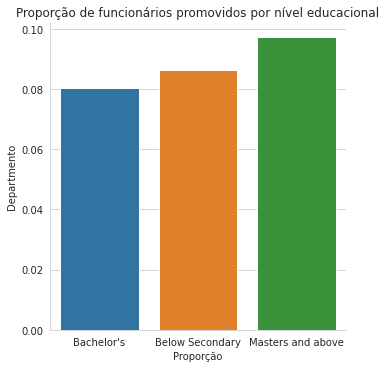

In [ ]:
sns.catplot(x='education', y='proportion', data=ds_edu_prop, kind='bar', height=5)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por nível educacional')
plt.ylabel('Departmento')
plt.xlabel('Proporção')
plt.show()

Aqui podemos ver que aqueles que possuem uma pós graduação são promovidos mais frequentemente que aqueles que possuem apenas um bacharelado. Surpreendentemente, os que não terminaram o ensino médio possuem uma taxa de promoção maior que aqueles que tem uma graduação. Uma hipótese para isso é que estes dois grupos não disputam os mesmos cargos, ao contrário daqueles que possuem pós graduação com aqueles que possuem graduação.

###"Gender"

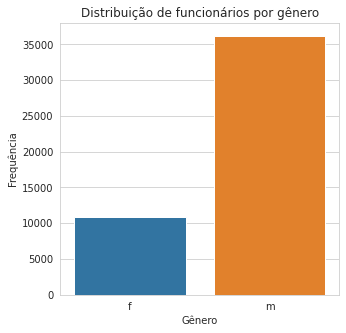

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=ds)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

Aqui podemos ver que a empresa é composta em sua maioria por homens.

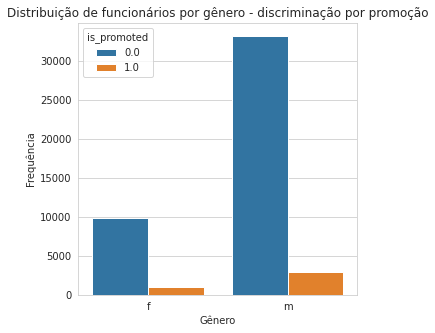

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=ds, hue='is_promoted')
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por gênero - discriminação por promoção')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

O gráfico acima, apesar de discriminar a promoção dos empregados, não faz um bom trabalho quando se trata de comparar os dois gêneros.

In [ ]:
#Mesmo procedimento
ds_gen = ds.groupby(['gender', 'is_promoted'])['department'].count()
gen_prop = []
for n in range(0, len(ds_gen), 2):
  gen_prop.append(ds_gen.iloc[n+1]/(ds_gen.iloc[n]+ds_gen.iloc[n+1]))

In [ ]:
ds_gen_prop = pd.DataFrame({'gender': ["f", "m"],
                            'proportion': gen_prop})

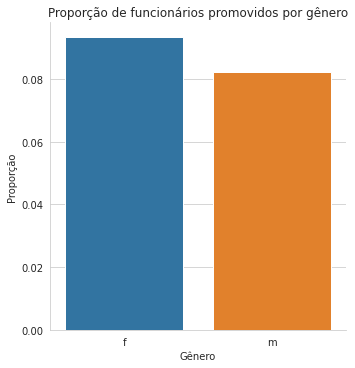

In [ ]:
sns.catplot(x='gender', y='proportion', data=ds_gen_prop, kind='bar', height=5)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.show()

Com o gráfico acima podemos comparar melhor a situação entre os dois gêneros. A porcentagem dos que foram promovidos é bem parelha entre os dois gêneros, com uma ligeira vantagem para as mulheres.

#####Gênero e outras features

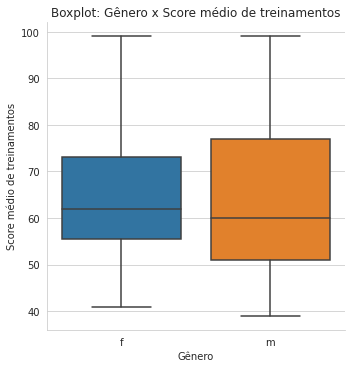

In [ ]:
sns.catplot(x='gender', y='avg_training_score', data=ds, kind='box', height=5, aspect=1)
plt.title('Boxplot: Gênero x Score médio de treinamentos')
plt.xlabel('Gênero')
plt.ylabel('Score médio de treinamentos')
plt.show()

O boxplot acima indica que o score médio das mulheres, ainda que tenha a mesma mediana dos homens, apresenta uma distribuição mais concentrada, ao passo que nos homens isto é mais distribuido.

###"Recruitment Channel"

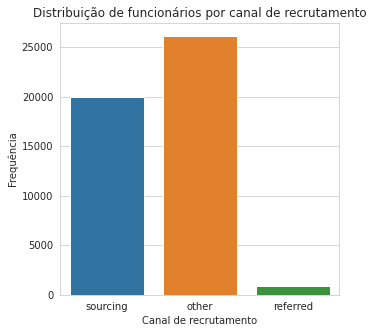

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='recruitment_channel', data=ds)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por canal de recrutamento')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Frequência')
plt.show()

Vemos pelo gráfico que outras formas que não indicações ou procura predominam entre os empregados.

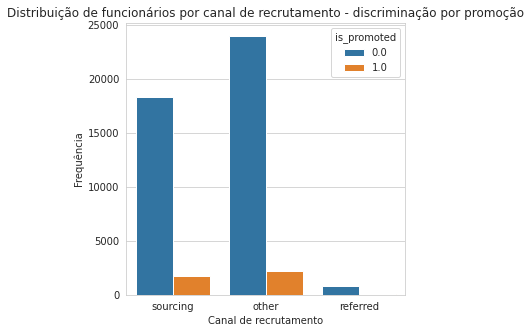

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='recruitment_channel', data=ds, hue='is_promoted')
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por canal de recrutamento - discriminação por promoção')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Frequência')
plt.show()

Novamente, há como comparar as categorias quanto a proporção de funcionários que foram promovidos, mas ainda ão fica totalmente claro.

In [ ]:
ds_rec = ds.groupby(['recruitment_channel', 'is_promoted'])['department'].count()
rec_prop = []
for n in range(0, len(ds_rec), 2):
  rec_prop.append(ds_rec.iloc[n+1]/(ds_rec.iloc[n]+ds_rec.iloc[n+1]))

In [ ]:
ds_rec_prop = pd.DataFrame({'recruitment_channel': ["other", "referred", "sourcing"],
                            'proportion': rec_prop})

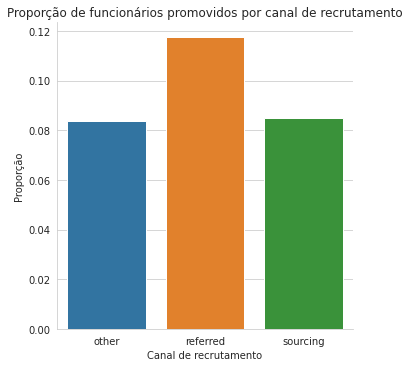

In [ ]:
sns.catplot(x='recruitment_channel', y='proportion', data=ds_rec_prop, kind='bar', height=5)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por canal de recrutamento')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Proporção')
plt.show()

Com este gráfico é possível ver que os funcionários indicados tem uma maior porcentagem de promoção em relação as demais. 

#####Canal de recrutamento e outras features

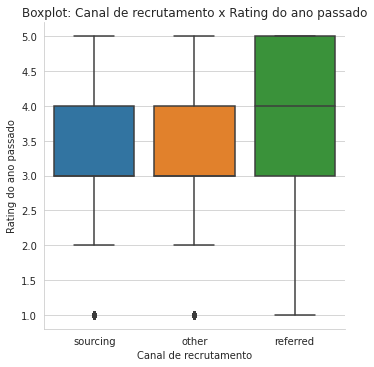

In [ ]:
sns.catplot(x='recruitment_channel', y='previous_year_rating', data=ds, kind='box', height=5, aspect=1)
plt.title('Boxplot: Canal de recrutamento x Rating do ano passado')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Rating do ano passado')
plt.show()

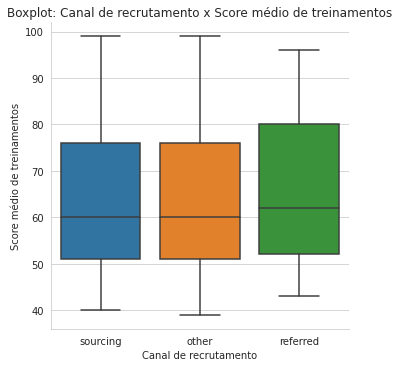

In [ ]:
sns.catplot(x='recruitment_channel', y='avg_training_score', data=ds, kind='box', height=5, aspect=1)
plt.title('Boxplot: Canal de recrutamento x Score médio de treinamentos')
plt.xlabel('Canal de recrutamento')
plt.ylabel('Score médio de treinamentos')
plt.show()

Vemos pelos dois gráficos que a categoria de empregados que foram indicados possui métricas de avaliação melhores que os demais.

###"Awards won"

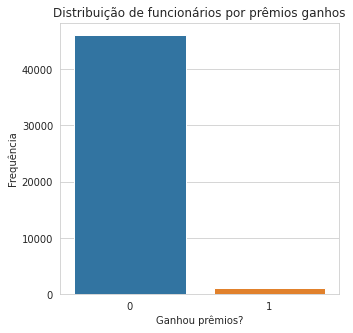

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='awards_won?', data=ds)
sns.set_style('whitegrid')
plt.title('Distribuição de funcionários por prêmios ganhos')
plt.xlabel('Ganhou prêmios?')
plt.ylabel('Frequência')
plt.show()

Vemos aqui que pouquíssimos funcionários chegaram a ganhar prêmios dentro da empresa.

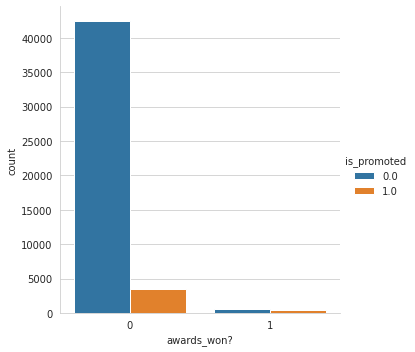

In [ ]:
sns.catplot(x='awards_won?', kind='count', data=ds, hue='is_promoted')

No gráfico acima já é possível notar que uma proporção muito maior de funcionários que ganharam prêmios foram promovidos. Mas, para fins de comparação, faremos ainda outro gráfico.

In [ ]:
ds_won = ds.groupby(['awards_won?', 'is_promoted'])['department'].count()
won_prop = []
for n in range(0, len(ds_won), 2):
  won_prop.append(ds_won.iloc[n+1]/(ds_won.iloc[n]+ds_won.iloc[n+1]))

In [ ]:
ds_won_prop = pd.DataFrame({'awards_won?': ['0', '1'],
                            'proportion': won_prop})

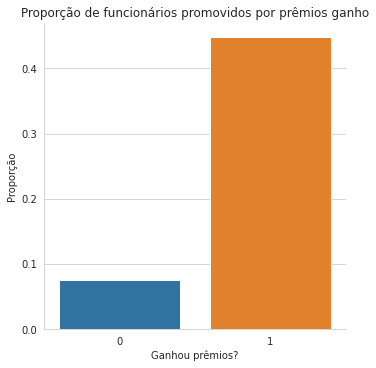

In [ ]:
sns.catplot(x='awards_won?', y='proportion', data=ds_won_prop, kind='bar', height=5)
sns.set_style('whitegrid')
plt.title('Proporção de funcionários promovidos por prêmios ganho')
plt.xlabel('Ganhou prêmios?')
plt.ylabel('Proporção')
plt.show()

Finamente, podemos observar que a proporção de pessoas promovidas entre aqueles que ganharam prêmios é mais de 4 vezes maior.

#####Ganhou prêmios? e outras features

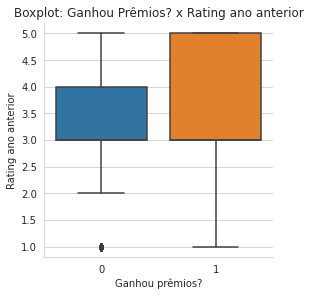

In [ ]:
sns.catplot(x='awards_won?', y='previous_year_rating', data=ds, kind='box', height=4, aspect=1)
plt.title('Boxplot: Ganhou Prêmios? x Rating ano anterior')
plt.xlabel('Ganhou prêmios?')
plt.ylabel('Rating ano anterior')
plt.show()

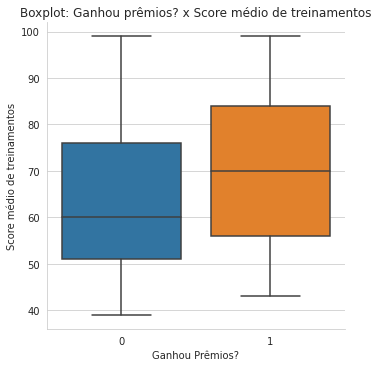

In [ ]:
sns.catplot(x='awards_won?', y='avg_training_score', data=ds, kind='box', height=5, aspect=1)
plt.title('Boxplot: Ganhou prêmios? x Score médio de treinamentos')
plt.xlabel('Ganhou Prêmios?')
plt.ylabel('Score médio de treinamentos')
plt.show()

Há, por fim há também uma superioridade nas métricas de avaliação daqueles que ganharam prêmios.

##Conclusões

Com esta análise, foi possível observar as correlações tanto entre as features e a nossa variável target, quanto entre as features em sí. Observou-se que métricas como "previous year rating" e "average training score" podem ser predizer relativamente bem se o empregado em questão será promovido ou não. Além disso, em features categóricas como "education", "recruitment channel" e "awards won" foi possível mostrar uma correlação sólida com a variável target. Por fim, é necessário dizer que outras relações poderiam ser mostradas, mas como o objetivo é montar um modelo de predição, optou-se por focar nas variáveis que pudessem ter um impacto maior na variável target.